# Exploratory Data Analysis
This notebook was created to save a number of ideas and best practices concerning EDA. It is created out of the interesting course by [DataCamp](https://app.datacamp.com/learn/courses/exploratory-data-analysis-in-python). 

## Notes 
This notebook requires the installation of an additional library used to model the data in terms of probablity concepts such as PMF, CDF and PDF. The library in question is ***empiricaldist*** and can be installed by from this [site](https://pypi.org/project/empiricaldist/)  
The methods used here are demonstrated in this [demo](https://nbviewer.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb)

In [1]:
import empiricaldist as edist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [31]:
sur_data_link = "https://assets.datacamp.com/production/repositories/3996/datasets/ab13162732ae9ca1a9a27e2efd3da923ed6a4e7b/young-people-survey-responses.csv"
sur_df = pd.read_csv(sur_data_link).drop('Unnamed: 0', axis=1)

In [ ]:
print(sur_df.head())
m = "Mathematics"

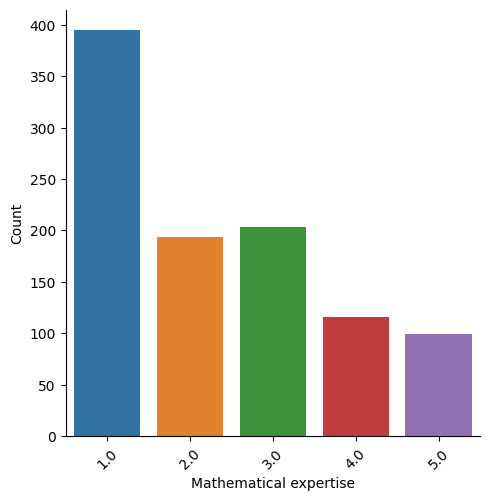

In [33]:
sns.catplot(data=sur_df, x=m, kind='count')
plt.xlabel("Mathematical expertise")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# let's consider this relation using PMF

In [34]:
from empiricaldist import Pmf
math_pmf = Pmf.from_seq(sur_df[m]) # the data is normalized to represent probabilities

# PMFs might not be the best feature of the library: it is useful only with a small number of unique values.
# PMFs give you better idea than histograms as histograms tend to group values together which might mask certain useful insights.


CDF is the probability that random value would be less than $t$. In other words if we have a random variable $X$, then $P(x < t)$ = $CDF(t)$. CDF are quite powerful tools for exploring data.

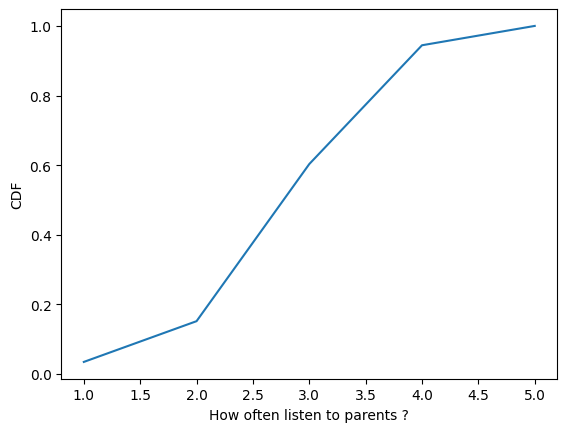

In [35]:
# let's consider both discrete and continous values
from empiricaldist import Cdf
pars_cdf = Cdf.from_seq(sur_df["Parents' advice"])
pars_cdf.plot()
plt.xlabel('How often listen to parents ?')
plt.ylabel('CDF')
plt.show()
# a CDF for discrete (with few values is not the optimal tool)
# let's see how it works for continous values

In [36]:
food_con = pd.read_csv("https://assets.datacamp.com/production/repositories/5786/datasets/49f6356966016c70a9f63a0474942675377bdcf2/food_consumption.csv").drop('Unnamed: 0', axis=1)

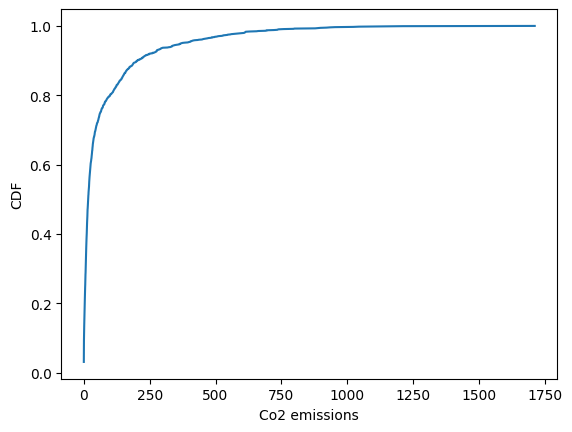

In [37]:
co2_cdf = Cdf.from_seq(food_con['co2_emission'])
co2_cdf.plot()
plt.xlabel('Co2 emissions')
plt.ylabel('CDF')
plt.show() # this clearly tells us that the distribution of co2 emission is logarithmic as most values are within 250 (whatever unit used)

In [38]:
# let's see the probability of a random value being less than 500
print(co2_cdf(500.0)) # so ~ 0.97 of the co2 emission are lower than 500
print(co2_cdf(250))
# let's consider the inverse operations: in other words, the value for which a certain probability is achieved
print(co2_cdf.inverse(0.3)) 

0.9685314685314685
0.9195804195804196
7.04


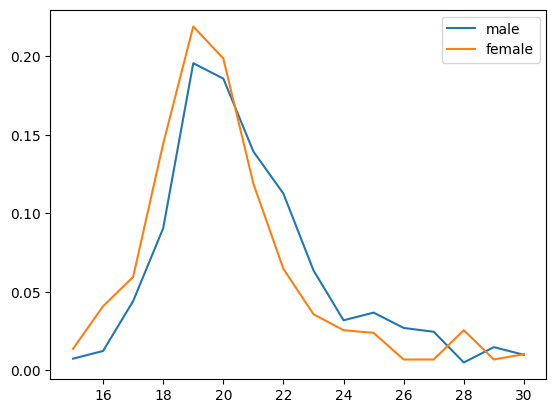

In [39]:
# let's consider the age column in the survery data
age_male = sur_df[sur_df['Gender'] == 'male']['Age']
age_female = sur_df[sur_df['Gender'] == 'female']['Age']

a_m_pmf = Pmf.from_seq(age_male)
a_f_pmf = Pmf.from_seq(age_female)

a_m_pmf.plot(label='male')
a_f_pmf.plot(label='female')
plt.legend()
plt.show()

In [40]:
# this plot gives us a clear idea on which ages the number of females
# is larger than the males' 

# let's compare two co2_emissions for twod different foods in the food consumption dataframe
print(np.unique(food_con['food_category']))
# what about eggs and pork ?
pork_co2 = food_con[food_con['food_category'] == 'pork']['co2_emission']
eggs_co2 = food_con[food_con['food_category'] == 'eggs']['co2_emission']

pork_cdf = Cdf.from_seq(pork_co2)
eggs_cdf = Cdf.from_seq(eggs_co2)

['beef' 'dairy' 'eggs' 'fish' 'lamb_goat' 'nuts' 'pork' 'poultry' 'rice'
 'soybeans' 'wheat']


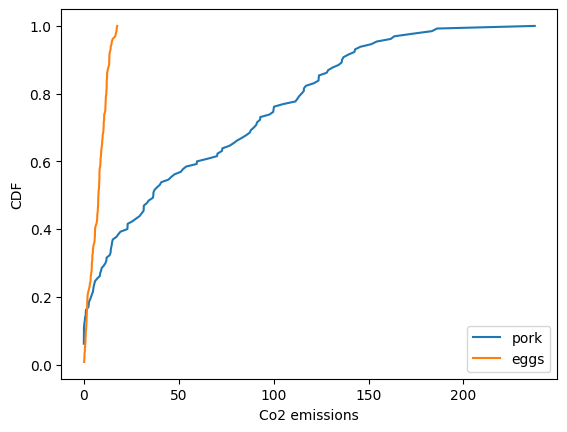

In [41]:
pork_cdf.plot(label='pork')
eggs_cdf.plot(label='eggs')

plt.legend()
plt.xlabel('Co2 emissions')
plt.ylabel('CDF')
plt.show()


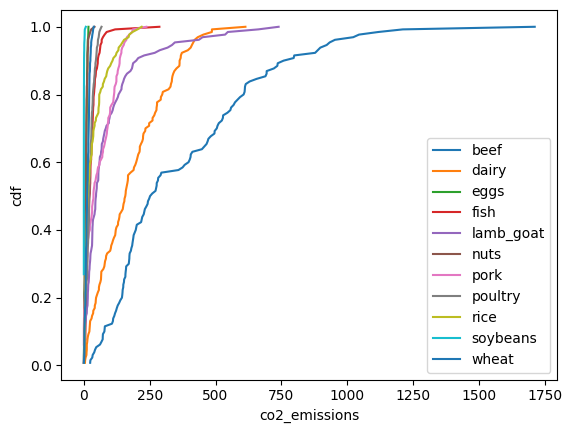

In [42]:
# let's take this a step further and compare all co2 emissions for all food categories
for v in np.unique(food_con['food_category']):
    data = food_con[food_con['food_category'] == v]['co2_emission']
    data_cdf = Cdf.from_seq(data)
    data_cdf.plot(label=v)
plt.legend()
plt.xlabel('co2_emissions')
plt.ylabel('cdf')
plt.show()   

Comparing the CDF's, we can come to the conclusion that wheat, dairy and lamb are the products reproducing the most co2 emissions.  

We considered CDF. CDF are generally obtained out of integrating another function referred to as PDF.

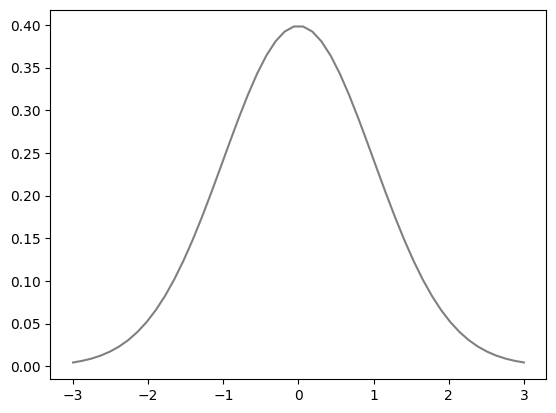

In [43]:
# let's consider the normal distribution function
from scipy.stats import norm
xs = np.linspace(-3, 3) # splitting the interval -3, 3 into equal intervals.
ys = norm(0, 1).pdf(xs) # standard normal function
plt.show()
plt.plot(xs, ys, color='gray')

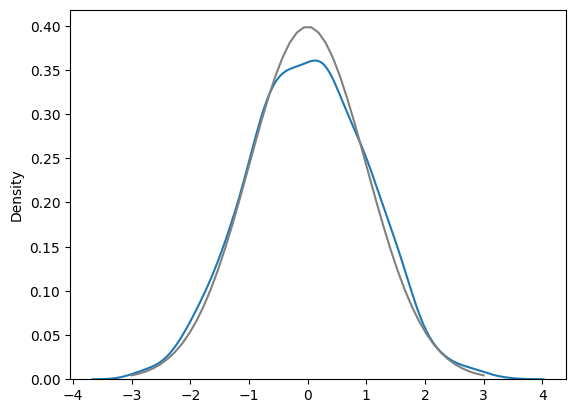

In [44]:
# certain random variables have unknown PDF's. Seaborn offers one way to approximate this function 
# and display it 

# let's choose a random sample of values from the standard random distribution
sample = np.random.normal(size=1000)
sns.kdeplot(sample)
plt.plot(xs, ys, color='gray')
plt.show()

## Exploring relation between 2 variables
So far, I only considered the distrbution of a single variable. However, In most cases, the task would require more than that. Let's consider some useful tools to analyse the relationship between two variables

In [55]:
# for this section we will consider a different dataset.
mpg = pd.read_csv("https://assets.datacamp.com/production/repositories/3996/datasets/e0b285b89bdbfbbe8d81123e64727ff150d544e0/mpg.csv")
print(mpg.head())
mpg.dropna(inplace=True)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


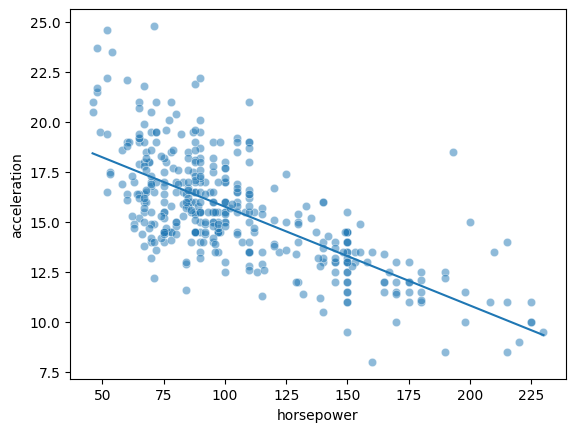

In [63]:
from scipy.stats import linregress
## Scatter plots are quite useful to better understand how one variables varies in terms of the other one
y = mpg['acceleration'].values
x = mpg['horsepower'].values
sns.scatterplot(data=mpg, y='acceleration', x='horsepower', alpha=0.5)

reg_line = linregress(x, y)
reg_x = np.array([np.min(x), np.max(x)])
reg_y = reg_line.intercept + reg_line.slope * reg_x
plt.plot(reg_x, reg_y)
plt.xlabel('horsepower')
plt.ylabel('acceleration')
plt.show()

LinregressResult(slope=-1.0753898616737876, intercept=26.36398585378899, rvalue=-0.6967016657573969, pvalue=3.1596606536686084e-58, stderr=0.056069223428706294, intercept_stderr=0.5730850323269666)


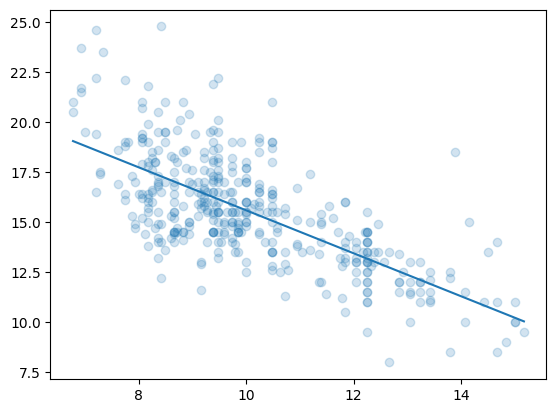

In [59]:
# it is clear that there is a relation between horsepower and acceleration
# let's consider the square of the acceleration
# mpg['acc2'] = mpg['acceleration'] ** 2
mpg['horsepower_sqrt'] = np.sqrt(mpg['horsepower'])
x = mpg['horsepower_sqrt']
y = mpg['acceleration']
# sns.relplot(data=mpg, kind='scatter', x='horsepower_sqrt', y='acceleration', alpha=0.2)
plt.scatter(x, y, alpha=0.2, marker='o')

# let's consider plotting the best line that fits the current transformation
best_line = linregress(x.values, y.values)
line_x = np.linspace(np.min(x), np.max(x))
# line_x = np.array([np.min(x), np.max(x)])
print (best_line)
line_y = best_line.intercept + best_line.slope * line_x
plt.plot(line_x, line_y, '-')
plt.show()


In [49]:
# if one variable is discrete while the other is continous, it might be fruitful
# to consider  box plot or a violin plot or
